# CS 101:  Introduction to Computing for Science and Engineering

## `lab10`—Radioactive Decay

❖ Objectives

-   Utilize NumPy's random number generation to simulate a random system.
-   Solve a system involving multiple simultaneous equations.

<div class="alert alert-info">
**30 min.**:  In the first part of this lab, we will model a collection of unstable radioactive nuclei.  This will be a solo project that you'll then discuss as a lab group.
</div>

<div class="alert alert-warning">
**30 min.**:  Next, we will consider a mixed collection of nuclei, some stable, some unstable.  You'll work on this as a team, and one of you will submit the code you've written collaboratively.
</div>

<div class="alert alert-success">
**Rest of lab**:  Finally, we will solve a set of differential equations to see how bulk nuclear populations change over time.  This will be done working on your own.
</div>

In [1]:
# Import basic libraries.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams[ 'figure.figsize' ] = (15,2)

##  Radioactive Decay [Solo Lab, 30 min.]

Consider a collection of unstable radioactive nuclei.  These are expected to decay at a consistent rate $\lambda \text{d}t$, which we can integrate to obtain the following expression for the number of nuclei $N$ remaining at a given time, 

$$
N(t) = N_{0} \exp\left( -\lambda t \right) \text{.}
$$

The probability that *any particular atom* decays in a given span of time is, of course, random, and the foregoing treatment applies to the bulk material.

First, we'll model a simple system containing $N_{0}$ nuclei of a highly radioactive species.  These will be represented by a one-dimensional array containing $1.0$ for undecayed nuclei and $0.0$ for decayed nuclei.  (Real systems have so many atoms that even a large collection, $O(10^{9})$, may only rarely exhibit decay.) 

The decay constant is related to the half-life by the formula
$$
\lambda = \frac{\log(2)}{t_{1/2}}
$$
where $\log$ is the natural logarithm.

-   Compose a function `l_decay` which returns the value of the decay constant $\lambda$ given as parameter the half-life $t_{1/2}$.

In [2]:
# Compose your function `l_decay` here.
from math import log
def l_decay(t_half):
    return log(2)/t_half

In [7]:
# You may test your function here if desired.


In [8]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( l_decay(1.5),np.log(2)/1.5 )
print('Success!')

Success!


-   Define the set of initial parameters.  Include appropriate comments (units, etc.).

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `t`      | `1e8`  | half-life |
| `l`      | calculated | decay constant; use `l_decay` |
| `num`    | `100`  | number of starting nuclei |
| `nt`     | `1000` | number of time steps |
| `dt`     | `1e-3` | size of time step |
| `tmax`   | calculated | duration of simulation |

In [51]:
# Define your system parameters here.
t = 1e8 # half-life
l = l_decay(t) # decay constant
num = 100 # number of starting nuclei
nt = 1000 # number of time steps
dt = 1e-3 # size of time step
tmax = nt * dt # duration of simulation

In [14]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert type(t)    == float and isclose( t,1e8 )
assert type(l)    == float and isclose( l,6.931e-9 )
assert type(num)  == int   and num   == 100
assert type(nt)   == int   and nt    == 1000
assert type(dt)   == float and isclose( dt,1e-3 )
assert type(tmax) == float and isclose( tmax,nt*dt )
print('Success!')

Success!


-   Compose a function `decay` which returns an array containing the final composition of the system given parameters `l` (decay constant); `num` (number of atoms); `nt` (number of time steps); `dt` (size of time step).
    
    This function will need to carry out the following algorithm:
    
    1.  Create an array containing `1`s of shape `(num,1)` (*i.e.*, a 1D array or vector).  These represent discrete individual atoms.
    2.  Loop over the number of time steps (making sure to include the last value!).
        3.  Loop over the index of each atom.  For each atom:
            4.  If the atom has already decayed (is `0.0`), skip it.
            5.  Calculate a random number between 0 and 1 using the `np.random.uniform()` function.
            6.  If the value of that random number is less than the decay constant times the time step size, decay occurs and the atom at that index decays (is set to `0.0`).
    7.  Return the resulting array.

In [79]:
# Compose your function `decay` here.
def decay(l,num,nt,dt):
    atoms = np.ones([num,1])
    for n in range(nt+1):
        for a in range(len(atoms)):
            if atoms[a] == 0.0:
                continue
            if atoms[a] == 1.0:
                x = np.random.uniform()
                if x < l * dt: 
                    atoms[a] = 0.0
    return atoms

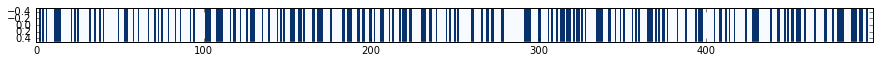

In [80]:
# This cell plots your results for one set of parameters.  (We discuss the plot in a moment.)
N_atoms = decay( 1e1,500,100,1e-3 )
plt.imshow( N_atoms.transpose(),interpolation='none',cmap=mpl.cm.Blues,aspect=20 )
plt.show()

In [81]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
N = decay( 1e-1,500,100,1e-3 )
assert type(N)    == np.ndarray and N.shape    == (500,1) and sum(N) > 450 and sum(N) <= 500
print('Success!')

Success!


It's hard to see much in the default plot setting, so we made a handful of adjustments in `imshow`:

-   `N.transpose()` will *transpose* the array, or flip which axis is horizontal and which is vertical.  This makes the plot go across the screen and gives more room.
-   `interpolation='none'` will turn off interpolation, which otherwise makes the boundaries between array squares fuzzy.  This interpolation is desirable on a grid plotting a function, for instance, but when we are plotting discrete values (like the presence or absence of an atom), it's distracting and confusing to include it.
-   `cmap = mpl.cm.Blues` will change the default colormap (which values are which colors).  [Many of these are available](http://matplotlib.org/examples/color/colormaps_reference.html).
-   `aspect=20` will make the plot long and skinny, but still tall enough to see the atoms (rather like a spectrum).

You can play with all of these settings in the cell below while you're waiting for others to finish the lab.

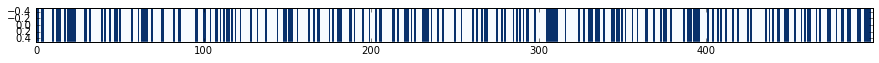

In [82]:
N = decay( 1e1,500,100,1e-3 )
plt.imshow( N.transpose(),interpolation='none',cmap=mpl.cm.Blues,aspect=20 )
plt.show()

The sum of the resulting matrix represents the number of remaining undecayed atoms:

In [83]:
sum(N)[0]

185.0

##  Radioactive Decay [Group Lab, 20 min. + 10 min. discussion]

Now we'll model a system of three atoms.  The first atom (1) decays into the second atom (2) at a rate $\lambda_1 \textrm{d}t$, while the second atom (2) decays into the third atom (3) at a rate $\lambda_2 \textrm{d}t$:

$$
\textrm{atom}_{1} \overset{\lambda_1}{\rightarrow} \textrm{atom}_{2} \overset{\lambda_2}{\rightarrow} \textrm{atom}_{3}
$$

This code will look fairly similar to your former code, but there are a few key differences.  For instance, let's store the decay constants as a `list` with two entries for atoms 1 and 2 (indices `0` and `1`).  We'll have an array which first consists solely of `1`s, but which transforms into `2`s (which in turn transform into `3`s).

-   Compose a function `decay2` which returns an array containing the final composition of the system given parameters `l` (decay constants as a `list`); `num` (number of atoms); `nt` (number of time steps); `dt` (size of time step).
    
    This function will need to carry out the following algorithm:
    
    1.  Create an array containing `1`s of length `num` (all atom 1).
    2.  Loop over the number of time steps (making sure to include the last value!).
        3.  Loop over the index of each atom.  For each atom:
            4.  If the atom is 1:
                5.  Calculate a random number between 0 and 1 using the `np.random.uniform()` function.
                6.  If the value of that random number is less than the appropriate decay constant times the time step size, decay occurs and the atom at that index decays (is set to `2`).
            7.  If the atom is 2:
                8.  Calculate a random number between 0 and 1 using the `np.random.uniform()` function.
                9.  If the value of that random number is less than the appropriate decay constant times the time step size, decay occurs and the atom at that index decays (is set to `3`).
            10.  If the atom is 3:
                11. Skip this atom.
    12. Return the resulting array.

In [102]:
# Compose your function `decay2` here.
def decay2(l,num,nt,dt):
    atoms = np.ones([num,1])
    for n in range(nt+1):
        for a in range(len(atoms)):
            if atoms[a] == 1:
                ran1 = np.random.uniform()
                if ran1 < l[0] * dt:
                    atoms[a] = 2
            elif atoms[a] == 2:
                ran2 = np.random.uniform()
                if ran2 < l[1] * dt:
                    atoms[a] = 3
            elif a == 3:
                pass
    return atoms

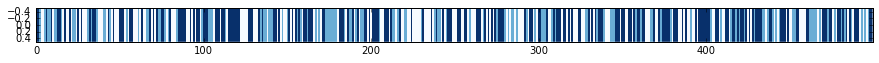

In [103]:
# This cell plots your results for one set of parameters.  (We discuss the plot in a moment.)
N_atoms = decay2( [ 1e1,2e1 ],500,100,1e-3 )
plt.imshow( N_atoms.transpose(),interpolation='none',cmap=mpl.cm.Blues,aspect=20 )
plt.show()

In [104]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
N = decay2( [ 1e1,2e1 ],500,100,1e-3 )
assert type(N)    == np.ndarray and N.shape    == (500,1) and sum(N) > 900 and sum(N) <= 1100
print('Success!')

Success!


This is a group lab, so you should write down the names and NetIDs of your group in the cell below:

In [ ]:
'''
write them here
'''

##  Radioactive Decay [Solo Lab, rest of class]

For atomistic systems (meaning composed of collections of atoms at a resolution where we can actively simulate atomic behavior), the above approach can be adequate.  For real-world scenarios, however, we need to simulate far larger quantities than this approach would permit:  thus we use a set of differential equations to describe transition rates between species.

For example, the species A, B, C, and D have the following decay-chain relationship:  A $\overset{\lambda_{A}}{\rightarrow}$ B $\overset{\lambda_{B}}{\rightarrow}$ C $\overset{\lambda_{C}}{\rightarrow}$ D, which is stable.

$$
\frac{\textrm{d}N_{A}}{\textrm{d}t} = -\lambda_{A} N_{A}
\hspace{2cm}
\frac{\textrm{d}N_{B}}{\textrm{d}t} = -\lambda_{B} N_{B} + \lambda_{A} N_{A}
\hspace{2cm}
\frac{\textrm{d}N_{C}}{\textrm{d}t} = -\lambda_{C} N_{C} + \lambda_{B} N_{B}
\hspace{2cm}
\frac{\textrm{d}N_{D}}{\textrm{d}t} = \lambda_{C} N_{C}
$$

Since these equations can be analytically integrated, we don't have to worry about adopting a finite-difference approach in this case:  we can solve directly for the (rather complicated) relationships:

$$
N_{A}(t) = N_{0} \exp(-\lambda_{A} t) \\
N_{B}(t) = N_{0} \frac{\lambda_{A}}{\lambda_{B}-\lambda_{A}} \left( \exp(-\lambda_{A} t) - \exp(-\lambda_{B} t) \right) \\
N_{C}(t) = N_{0} \lambda_{A}\lambda_{B}
\left(
    \frac{ \exp(-\lambda_{A} t)}{(\lambda_{B}-\lambda_{A})(\lambda_{C}-\lambda_{A})} +
    \frac{ \exp(-\lambda_{B} t)}{(\lambda_{A}-\lambda_{B})(\lambda_{C}-\lambda_{B})} +
    \frac{ \exp(-\lambda_{C} t)}{(\lambda_{A}-\lambda_{C})(\lambda_{B}-\lambda_{C})}
\right) \\
N_{D}(t) = N_{0} \left[ 1+ \lambda_{A}\lambda_{B}\lambda_{C}
\left(
    \frac{ \exp(-\lambda_{A} t)}{(\lambda_{B}-\lambda_{A})(\lambda_{C}-\lambda_{A})(\lambda_{D}-\lambda_{A})} +
    \frac{ \exp(-\lambda_{B} t)}{(\lambda_{A}-\lambda_{B})(\lambda_{C}-\lambda_{B})(\lambda_{D}-\lambda_{B})} +
    \frac{ \exp(-\lambda_{C} t)}{(\lambda_{A}-\lambda_{C})(\lambda_{B}-\lambda_{C})(\lambda_{D}-\lambda_{C})}
\right) \right] \\
$$

where $N_0$ is the initial amount of material (all A).  We will take $N_0 = 1$.

Your task in this final portion of the lab is to code these equations and simulate the system for an appropriate number of time steps.

-   Compose a function `chaindecay` which returns an $N \times 5$ array given parameters `nt` ($=N$, number of time steps); `dt`, size of a time step; and a `list` `l` containing the four decay constants.  The array should be structured such that the first column contains the time $t$ and the other four columns contain the proportion of each species for that time value.
    
    We recommend writing constants in your code instead of writing the denominators so many times.  For instance, consider writing
    
        c_ac = l[0] - l[2]  # l_a - l_c
        -l[0]*t/c_ac  # etc.

In [110]:
# compose your function here
def chaindecay(nt,dt,l):
    atoms = np.ones([nt,5])
    N_o = 1.0
    tmax = nt * dt
    from math import exp
    a = l[0]
    b = l[1]
    c = l[2]
    d = l[3]
    b_ba = b - a
    c_ca = c - a
    d_da = d - a
    a_ab = a - b
    a_ac = a - c
    c_cb = c - b
    d_db = d - b
    c_ac = a - c
    b_bc = b - c
    d_dc = d - c
    N_a = N_o*exp(-a*t)
    N_b = N_o*(a/b_ba)*(exp(-a*t) - exp(-b*t))
    N_c = N_o*a*b((exp(-a*t)/(b_ba*c_ca)) + (exp(-b*t)/(a_ab*c_cb)) + (exp(-c*t)/(a_ac*b_bc)))
    N_d = N_o*a*b*c((exp(-a*t)/(b_ba*c_ca*d_da)) + (exp(-b*t)/(a_ab*c_cb*d_db)) + (exp(-c*t)/(a_ac*b_bc*d_dc)))

In [111]:
# test your function here
data = chaindecay( 100,0.01,[5e0,2e1,3e0,0] )
plt.plot( data[:,1:] )
plt.ylim( (0,1) )
plt.ylabel( 'amount of material' )
plt.xlabel( 'time step' )
plt.show()

TypeError: 'float' object is not callable

In [112]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
data = chaindecay( 100,0.01,[1e1,2e1,3e1,0] )
assert type(data) == np.ndarray and \
       data.shape == (101,5) and \
       isclose(np.sum(data[:,1:], axis=1)[-1], 1.0)
assert isclose( data[ 17,3 ], 0.122, rtol=1e-2 )
print('Success!')

TypeError: 'float' object is not callable

##  References

-   ["General solution of Bateman equations for nuclear transmutations"](http://www.sciencedirect.com/science/article/pii/S0306454906000284)
-   ["Simulating radioactive decay chains with spreadsheets"](http://wordpress.mrreid.org/wp-content/uploads/2011/07/simulating-radioactive-decay-chains-with-spreadsheets.pdf)

# Before you submit...

Before you submit this exercise, make sure that everything runs as expected.  You can either use the *Validate* button on the *Assignments* tab or type `nbgrader validate labX` at the command line.  **You should also *save* before submitting.**

Make sure that you have filled in any code block which says "YOUR CODE HERE" or "YOUR ANSWER HERE".

List any resources used (beyond the TA or the help files):

Double-click here to add collaborators or partners:  ☐

This laboratory exercise was written by Neal Davis for Computer Science 101 at the University of Illinois.

©2015–16 University of Illinois

![](./cs101-footer.png)